<a href="https://colab.research.google.com/github/skaty5678/Global-Terrorism-Analysis/blob/main/Global_Terrorism_Analysis_SANJEEV_KUMAR_THAKUR_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The Global Terrorism Database (GTD) is an open-source database including information on terrorist attacks around the world from 1970 through 2017. The GTD includes systematic data on domestic as well as international terrorist incidents that have occurred during this time period and now includes more than 180,000 attacks. The database is maintained by researchers at the National Consortium for the Study of Terrorism and Responses to Terrorism (START), headquartered at the University of Maryland.</b>

# <b> Explore and analyze the data to discover key findings pertaining to terrorist activities. </b>

.

#<b>TERRORISM:</b> <i>An Overview</i>





<h3>For the sake of simplicity we will try to get the picture of terrorism from the Global Terrorism Database's construction so that their is no issue in understanding the data visualizations. The GTD database uses the following definition of terrorism:</h3>



> <h3><i>The threatened or actual use of illegal force and violence by a non-state actor to attain a political, economic, religious, or social goal through fear, coercion, or intimidation. In practice this means in order to consider an incident for inclusion in the GTD, all three of the following attributes must be present:</i></h3>


> <ol>
  <h4>
  <i>
  <li> <b>The incident must be intentional</b> – the result of conscious   calculation on the part of a perpetrator.<br><br>
  <li> <b>The incident must entail some level of violence or immediate threat of violence</b> -including property violence, as well as violence against people.<br><br>
  <li><b>The perpetrators of the incidents must be sub-national actors.</b> The database does not include acts of state terrorism.<br><br>
  </i>
  </h4>
  </ol>

<h3><i>In addition, at least two of the following three criteria must be present for an incident to beincluded in the GTD:</i></h3> <br> 



> <ul>
  <h4>
  <i>
  <li><b>Criterion 1:</b> The act must be aimed at attaining a political, economic religious, or socialgoal. In terms of economic goals, the exclusive pursuit of profit does not satisfy this criterion. It must involve the pursuit of more profound, systemic economic change.<br><br>
  <li><b>Criterion 2:</b> There must be evidence of an intention to coerce,      intimidate, or convey some other message to a larger audience (or audiences) than the immediate victims. It is the act taken as a totality that is considered, irrespective if every individual involved in carrying out the act was aware of this intention. As long as any of the planners or decision-makers behind the attack intended to coerce, intimidate or publicize, the intentionality criterion is met.<br><br>
  <li><b>Criterion 3:</b> The action must be outside the context of legitimate warfare activities. That is, the act must be outside the parameters permitted by international humanitarian law, insofar as it targets non-combatants.
  </i>
  </h4>
  </ul>













<h2><b> Column Variables</b></h2>


<i>
<ul>
<li> <b>year, month</b> and <b>date - </b>These fields contain the year, month and date in which the incidents occurred.

<li> <b>region, country</b> and <b>province - </b>These fields identify the region, then drilling down to country or location and then again drilling down to province- where the incident occurred.

<li> <b>latitude</b> and <b>longitude - </b>These fields contain the latitudes and longitudes of the area where the incident occured.

<li> <b>success - </b>Success of a terrorist strike is defined according to the tangible effects of the attack. Success is not judged in terms of the larger goals of the perpetrators.

<li> <b>attack_type - </b>This field captures the general method of attack and often reflects the broad class of tactics used.

<li> <b>target_type - </b>The target or victim type field captures the general type of target/victim

<li> <b>target - </b>The target subtype variable captures the more specific target category and provides
the next level of designation for each target type

<li> <b>weapon_type - </b>This field records the general type of weapon used in the incident.

<li> <b>terror_group - </b>This field contains the name of the group that carried out the attack.

<li> <b>suicide - </b>Cases where there is evidence that the perpetrator did not intend to escape from the attack alive. 

<li> <b>killed - </b>This field stores the number of total confirmed fatalities for the incident. The number includes all victims and attackers who died as a direct result of the incident. 

<li> <b>wounded - </b>This field records the number of confirmed non-fatal injuries to both perpetrators and victims.

<li> <b>casualties - </b>Total number of kills and wounded as a direct result of the incident.



<li> <b>summary - </b>A brief narrative summary of the incident, noting the “when, where, who, what, how, and why.”



<li> <b>dbsource - </b>This field identifies the original data collection effort in which each event was recorded. Each value corresponds to a different data collection project or group. The three largest (PGIS, CETIS, and ISVG).
</i>











#<b>Setting the stage for our Dataset</b>


In [ ]:
#Bringing in all the important libraries required for a smooth data visualization.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import folium
import warnings
warnings.filterwarnings('ignore')
import matplotlib
matplotlib.rc_file_defaults()


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#the raw data

file_path = '/content/drive/MyDrive/Global Terrorism Analysis - SANJEEV KUMAR THAKUR/Global Terrorism Dataset/Global Terrorism Data.csv'
raw_gtd_df = pd.read_csv(file_path,encoding= 'ISO-8859-1')

In [ ]:
raw_gtd_df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,...,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,14,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,...,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,6,Hostage Taking (Kidnapping),NaN,NaN,NaN,NaN,7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",...,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,NaN,Mexico,1.0,800000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Voice of America,Employee,...,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,Western Europe,Attica,Athens,37.997490,23.762728,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Embassy,...,NaN,NaN,Explosive,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,East Asia,Fukouka,Fukouka,33.580412,130.396361,1.0,0,NaN,NaN,1,1,1,-9.0,NaN,NaN,0.0,1,0,7,Facility/Infrastructure Attack,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Consulate,...,NaN,NaN,Incendiary,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [ ]:
raw_gtd_df.tail()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,...,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
181686,201712310022,2017,12,31,NaN,0,NaN,182,Somalia,11,Sub-Saharan Africa,Middle Shebelle,Ceelka Geelow,2.359673,45.385034,2.0,0,The incident occurred near the town of Balcad.,12/31/2017: Assailants opened fire on a Somali...,1,1,0,1.0,1.0,Insurgency/Guerilla Action,0.0,1,0,2,Armed Assault,NaN,NaN,NaN,NaN,4,Military,36.0,Military Checkpoint,Somali National Army (SNA),Checkpoint,...,NaN,NaN,NaN,1.0,0.0,0.0,2.0,0.0,0.0,-9,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"""Somalia: Al-Shabaab Militants Attack Army Che...","""Highlights: Somalia Daily Media Highlights 2 ...","""Highlights: Somalia Daily Media Highlights 1 ...",START Primary Collection,0,0,0,0,NaN
181687,201712310029,2017,12,31,NaN,0,NaN,200,Syria,10,Middle East & North Africa,Lattakia,Jableh,35.407278,35.942679,1.0,1,The incident occurred at the Humaymim Airport.,12/31/2017: Assailants launched mortars at the...,1,1,0,1.0,1.0,Insurgency/Guerilla Action,0.0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,4,Military,27.0,Military Barracks/Base/Headquarters/Checkpost,Russian Air Force,Hmeymim Air Base,...,NaN,NaN,Mortars were used in the attack.,2.0,0.0,0.0,7.0,0.0,0.0,1,4.0,Unknown,-99.0,Seven military planes were damaged in this att...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"""Putin's 'victory' in Syria has turned into a ...","""Two Russian soldiers killed at Hmeymim base i...","""Two Russian servicemen killed in Syria mortar...",START Primary Collection,-9,-9,1,1,NaN
181688,201712310030,2017,12,31,NaN,0,NaN,160,Philippines,5,Southeast Asia,Maguindanao,Kubentog,6.900742,124.437908,2.0,0,The incident occurred in the Datu Hoffer distr...,12/31/2017: Assailants set fire to houses in K...,1,1,1,0.0,NaN,NaN,0.0,1,0,7,Facility/Infrastructure Attack,NaN,NaN,NaN,NaN,14,Private Citizens & Property,76.0,House/Apartment/Residence,Not Applicable,Houses,...,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,1,4.0,Unknown,-99.0,Houses were damaged in this attack.,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"""Maguindanao clashes trap tribe members,"" Phil...",NaN,NaN,START Primary Collection,0,0,0,0,NaN
181689,201712310031,2017,12,31,NaN,0,NaN,92,India,6,South Asia,Manipur,Imphal,24.798346,93.940430,1.0,0,The incident occurred in the Mantripukhri neig...,12/31/2017: Assailants threw a grenade at a Fo...,1,1,1,0.0,NaN,NaN,0.0,0,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,2,Government (General),21.0,Government Building/Facility/Office,Forest Department Manipur,Office,...,NaN,NaN,A thrown grenade was used in the attack.,0.0,0.0,0.0,0.0,0.0,0.0,-9,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"""Trader escapes grenade attack in Imphal,"" Bus...",NaN,NaN,START Primary Collection,-9,-9,0,-9,NaN
181690,201712310032,2017,12,31,NaN,0,NaN,160,Philippines,5,Southeast Asia,Maguindanao,Cotabato City,7.209594,124.241966,1.0,0,NaN,12/31/2017: An explosive device was discovered...,1,1,1,0.0,NaN,NaN,0.0,0,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,20,Unknown,NaN,NaN,Unknown,Unknown,...,NaN,NaN,An explosive device containing a detonating co...,0.0,0.0,0.0,0.0,0.0,0.0,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN

#<b>Data cleaning and preparation for analysis.</b>


In [ ]:
#getting the required columns
gtd_df = raw_gtd_df[['iyear','imonth','iday','region_txt','country_txt','provstate','latitude','longitude','success','attacktype1_txt','targtype1_txt','target1','weaptype1_txt','gname','suicide','nkill','nwound','nkillter','summary','motive','propextent','dbsource']]


In [ ]:
#renaming the required columns for easy readability
gtd_df.rename(columns = {'iyear':'year','imonth':'month','iday':'day','region_txt':'region','country_txt':'country','provstate':'province','attacktype1_txt':'attack_type','targtype1_txt':'target_type','target1':'target','weaptype1_txt':'weapon_type','gname':'terror_group','nkill':'killed','nwound':'wounded','nkillter':'perpetrator_kill','propextent':'propextent'},inplace = True)

In [ ]:
gtd_df.head()

,year,month,day,region,country,province,latitude,longitude,success,attack_type,target_type,target,weapon_type,terror_group,suicide,killed,wounded,perpetrator_kill,summary,motive,propextent,dbsource
0,1970,7,2,Central America & Caribbean,Dominican Republic,NaN,18.456792,-69.951164,1,Assassination,Private Citizens & Property,Julio Guzman,Unknown,MANO-D,0,1.0,0.0,NaN,NaN,NaN,NaN,PGIS
1,1970,0,0,North America,Mexico,Federal,19.371887,-99.086624,1,Hostage Taking (Kidnapping),Government (Diplomatic),"Nadine Chaval, daughter",Unknown,23rd of September Communist League,0,0.0,0.0,NaN,NaN,NaN,NaN,PGIS
2,1970,1,0,Southeast Asia,Philippines,Tarlac,15.478598,120.599741,1,Assassination,Journalists & Media,Employee,Unknown,Unknown,0,1.0,0.0,NaN,NaN,NaN,NaN,PGIS
3,1970,1,0,Western Europe,Greece,Attica,37.997490,23.762728,1,Bombing/Explosion,Government (Diplomatic),U.S. Embassy,Explosives,Unknown,0,NaN,NaN,NaN,NaN,NaN,NaN,PGIS
4,1970,1,0,East Asia,Japan,Fukouka,33.580412,130.396361,1,Facility/Infrastructure Attack,Government (Diplomatic),U.S. Consulate,Incendiary,Unknown,0,NaN,NaN,NaN,NaN,NaN,NaN,PGIS


In [ ]:
gtd_df.shape

(181691, 22)

In [ ]:
gtd_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 22 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   year              181691 non-null  int64  
 1   month             181691 non-null  int64  
 2   day               181691 non-null  int64  
 3   region            181691 non-null  object 
 4   country           181691 non-null  object 
 5   province          181270 non-null  object 
 6   latitude          177135 non-null  float64
 7   longitude         177134 non-null  float64
 8   success           181691 non-null  int64  
 9   attack_type       181691 non-null  object 
 10  target_type       181691 non-null  object 
 11  target            181055 non-null  object 
 12  weapon_type       181691 non-null  object 
 13  terror_group      181691 non-null  object 
 14  suicide           181691 non-null  int64  
 15  killed            171378 non-null  float64
 16  wounded           16

In [ ]:
gtd_df.describe()

,year,month,day,latitude,longitude,success,suicide,killed,wounded,perpetrator_kill,propextent
count,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,181691.000000,181691.000000,171378.000000,165380.000000,114733.000000,64065.000000
mean,2002.638997,6.467277,15.505644,23.498343,-4.586957e+02,0.889598,0.036507,2.403272,3.167668,0.508058,3.295403
std,13.259430,3.388303,8.814045,18.569242,2.047790e+05,0.313391,0.187549,11.545741,35.949392,4.199937,0.486912
min,1970.000000,0.000000,0.000000,-53.154613,-8.618590e+07,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,1991.000000,4.000000,8.000000,11.510046,4.545640e+00,1.000000,0.000000,0.000000,0.000000,0.000000,3.000000
50%,2009.000000,6.000000,15.000000,31.467463,4.324651e+01,1.000000,0.000000,0.000000,0.000000,0.000000,3.000000
75%,2014.000000,9.000000,23.000000,34.685087,6.871033e+01,1.000000,0.000000,2.000000,2.000000,0.000000,4.000000
max,2017.000000,12.000000,31.000000,74.633553,1.793667e+02,1.000000,1.000000,1570.000000,8191.000000,500.000000,4.000000


In [ ]:
#dealing with the null values
def missing_values(df):

  #total of missing values for each column
  total_missing_value = df.isna().sum()

  #percentage of missing values 
  percent_missing_value = total_missing_value*100/len(df)

  #making a table of the above results
  table = pd.concat([total_missing_value,percent_missing_value],axis = 1)

  #renaming the columns
  table.rename(columns = {0:'missing values',1:'percent of missing values'},inplace = True)

  #sorting the table in decreasing order by percentage of missing values
  missing_values_table = table.sort_values('percent of missing values',ascending = False).round(1)

  return missing_values_table



In [ ]:
#getting a tabular data of missing values
missing_values(gtd_df)

,missing values,percent of missing values
motive,131130,72.2
propextent,117626,64.7
perpetrator_kill,66958,36.9
summary,66129,36.4
wounded,16311,9.0
killed,10313,5.7
longitude,4557,2.5
latitude,4556,2.5
target,636,0.4
province,421,0.2


In [ ]:
#removing the columns with big extent of missing data 
gtd_df.drop(['motive','propextent','perpetrator_kill'],axis = 1,inplace = True)

#for Summary column where we don't have any data we'll replace it with unknown
gtd_df['summary'].replace(np.nan,'Unknown',inplace = True)

#Fill the NaN values in the killed and wounded columns with 0 as they're very few in numbers compared to our dataset
gtd_df[['killed', 'wounded']]=gtd_df[['killed', 'wounded']].fillna(value=0)


In [ ]:
#adding another column to the dataset as casualties
gtd_df['casualties'] = gtd_df['killed'] + gtd_df['wounded']

In [ ]:
#updated missing values
missing_values(gtd_df)

,missing values,percent of missing values
longitude,4557,2.5
latitude,4556,2.5
target,636,0.4
province,421,0.2
year,0,0.0
weapon_type,0,0.0
dbsource,0,0.0
summary,0,0.0
wounded,0,0.0
killed,0,0.0


In [ ]:
#Let's just try to visualise the missing data to have a better idea about it
import missingno as msno

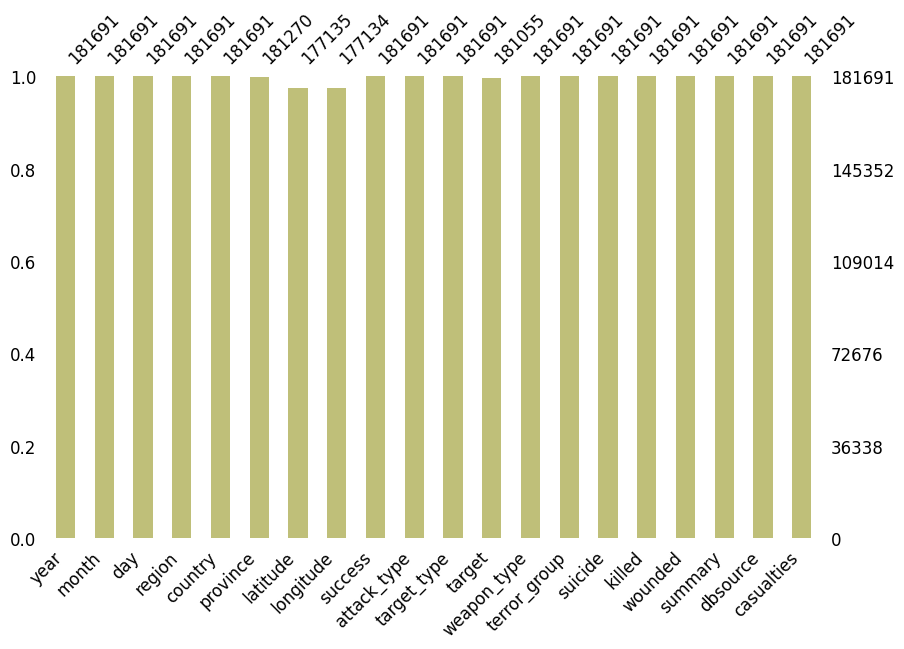

In [ ]:
# visualising the missing values
msno.bar(gtd_df,figsize = (10,6),fontsize = 12,color = (0.75,0.75,0.475))


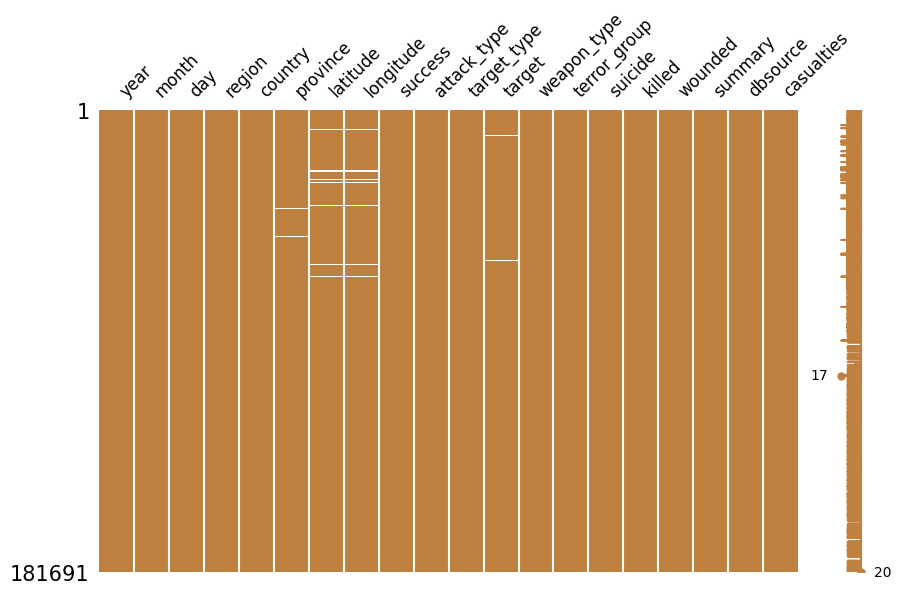

In [ ]:
# visualising where exactly the missing values are 
msno.matrix(gtd_df,figsize = (10,6),fontsize = 12,color = (0.75,.50,0.25))

#<b>Exploratory Data Analysis and Visualizations:</b>



In [ ]:
gtd_df.head()

,year,month,day,region,country,province,latitude,longitude,success,attack_type,target_type,target,weapon_type,terror_group,suicide,killed,wounded,summary,dbsource,casualties
0,1970,7,2,Central America & Caribbean,Dominican Republic,NaN,18.456792,-69.951164,1,Assassination,Private Citizens & Property,Julio Guzman,Unknown,MANO-D,0,1.0,0.0,Unknown,PGIS,1.0
1,1970,0,0,North America,Mexico,Federal,19.371887,-99.086624,1,Hostage Taking (Kidnapping),Government (Diplomatic),"Nadine Chaval, daughter",Unknown,23rd of September Communist League,0,0.0,0.0,Unknown,PGIS,0.0
2,1970,1,0,Southeast Asia,Philippines,Tarlac,15.478598,120.599741,1,Assassination,Journalists & Media,Employee,Unknown,Unknown,0,1.0,0.0,Unknown,PGIS,1.0
3,1970,1,0,Western Europe,Greece,Attica,37.997490,23.762728,1,Bombing/Explosion,Government (Diplomatic),U.S. Embassy,Explosives,Unknown,0,0.0,0.0,Unknown,PGIS,0.0
4,1970,1,0,East Asia,Japan,Fukouka,33.580412,130.396361,1,Facility/Infrastructure Attack,Government (Diplomatic),U.S. Consulate,Incendiary,Unknown,0,0.0,0.0,Unknown,PGIS,0.0


In [ ]:
# representing the correlation between different variables
gtd_df.corr()

,year,month,day,latitude,longitude,success,suicide,killed,wounded,casualties
year,1.000000,0.000139,0.018254,0.166933,0.003917,-0.082963,0.137736,0.021252,0.017484,0.020675
month,0.000139,1.000000,0.005497,-0.015978,-0.003880,-0.002845,0.003071,0.004031,0.003178,0.003805
day,0.018254,0.005497,1.000000,0.003423,-0.002285,-0.011802,0.003593,-0.003225,-0.001082,-0.001808
latitude,0.166933,-0.015978,0.003423,1.000000,0.001463,-0.073715,0.068682,-0.013170,0.015920,0.009899
longitude,0.003917,-0.003880,-0.002285,0.001463,1.000000,-0.000858,0.000486,-0.000587,0.000205,0.000013
success,-0.082963,-0.002845,-0.011802,-0.073715,-0.000858,1.000000,-0.031155,0.049619,0.023346,0.033487
suicide,0.137736,0.003071,0.003593,0.068682,0.000486,-0.031155,1.000000,0.136385,0.096101,0.119057
killed,0.021252,0.004031,-0.003225,-0.013170,-0.000587,0.049619,0.136385,1.000000,0.443326,0.651885
wounded,0.017484,0.003178,-0.001082,0.015920,0.000205,0.023346,0.096101,0.443326,1.000000,0.968724
casualties,0.020675,0.003805,-0.001808,0.009899,0.000013,0.033487,0.119057,0.651885,0.968724,1.000000


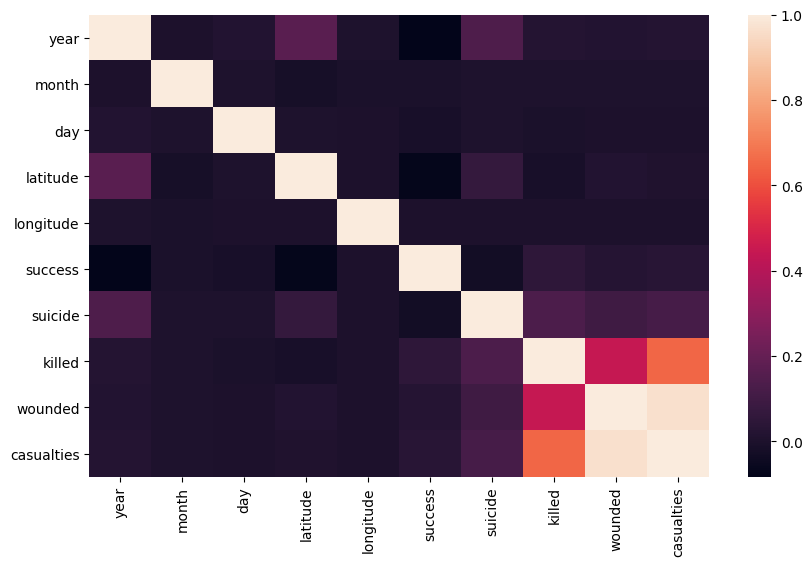

In [ ]:
#Heatmap for the correlation
plt.subplots(figsize=(10,6))
sns.heatmap(gtd_df.corr(),annot = False)
plt.show()


####As it's very obvious from the visualization that there not much of a correlation except the kills, wounded and casulities show positive correlation upto a cetain extent

##<b>Initial Analysis</b>

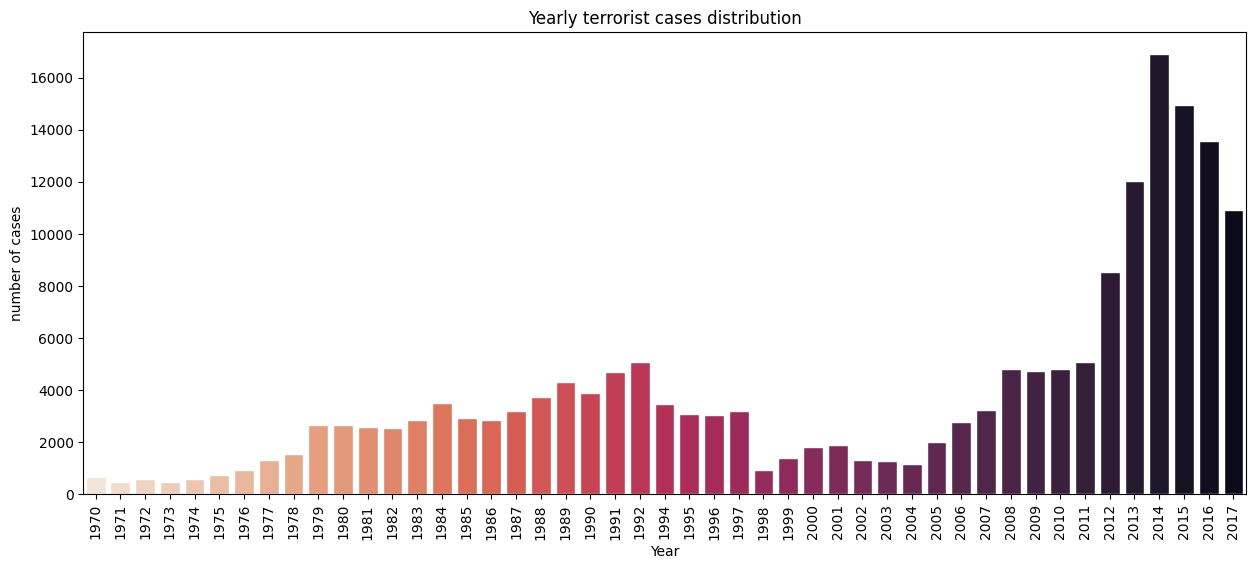

In [ ]:
#using seaborn to plot the number of terrorist cases VS year
plt.subplots(figsize=(15,6))
sns.set_theme(style="darkgrid",context = 'notebook')
sns.countplot('year',data = gtd_df,palette='rocket_r').set(title = 'Yearly terrorist cases distribution',xlabel = 'Year',ylabel = 'number of cases')
plt.xticks(rotation = 90)
plt.show()

###Pretty evidently there has been a boost to the number of terrorist activities since 2004-05 with 2014 being the worst hit year by those atrocities which is a matter of concern.

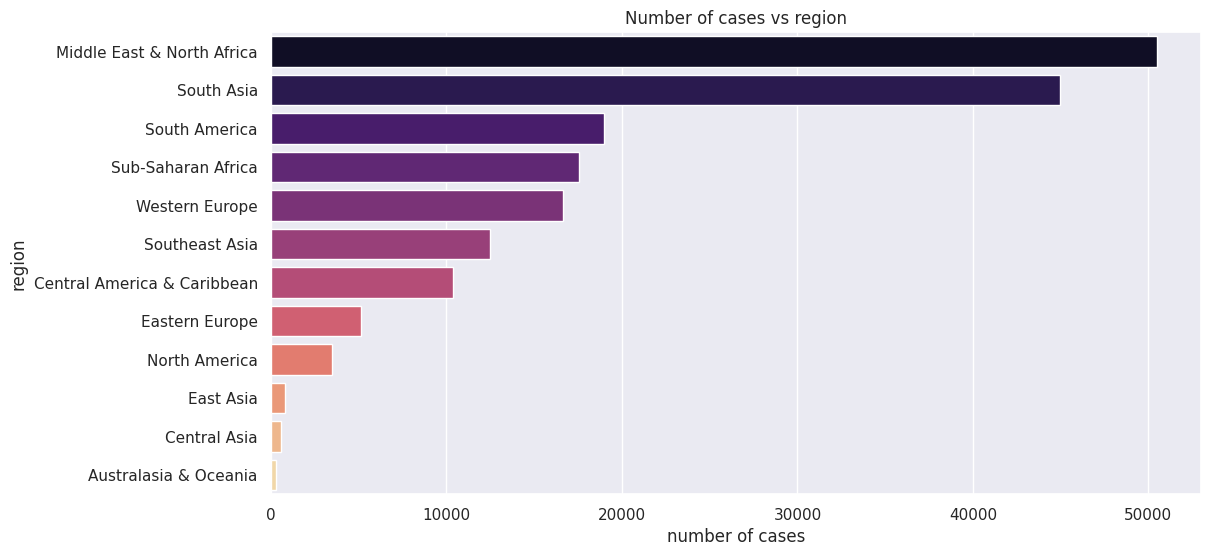

-------------------------------------------------------------------------------------------------------------------------


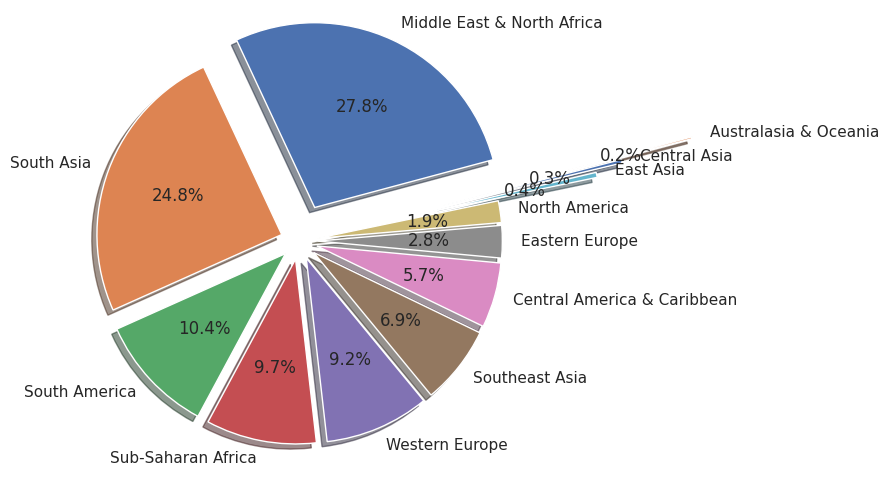

In [ ]:
#A countplot of total number of cases by region
plt.subplots(figsize=(12,6))
sns.set_theme(style="darkgrid",context = 'notebook')
sns.countplot(y = 'region',data = gtd_df,order = gtd_df['region'].value_counts().index,palette = 'magma').set(title = 'Number of cases vs region',ylabel = 'region',xlabel = 'number of cases')
plt.show()

print(f'-------------------------------------------------------------------------------------------------------------------------')

#A pie chart showing the percentage wise distribution of total number of cases per region
plt.subplots(figsize=(12,6))
pie_region = gtd_df['region'].value_counts()
my_explode = (0.2,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.65,0.8,1.2)
plt.pie(pie_region,labels = pie_region.index,startangle = 15,autopct='%1.1f%%',shadow = True,explode = my_explode)
plt.show()

####Middle east and South Africa are the most hit regions by the terrorist activities with almost 50,000 cases, followed by South Asia with cases mounting close to 44,000 cases and South Ameirca and the other regions.East Asia, Central Asia and Australia and Oceania are the regions with low number of cases compared to the other regions. 


####South Asia being the second in the list could be a major concern for India too.

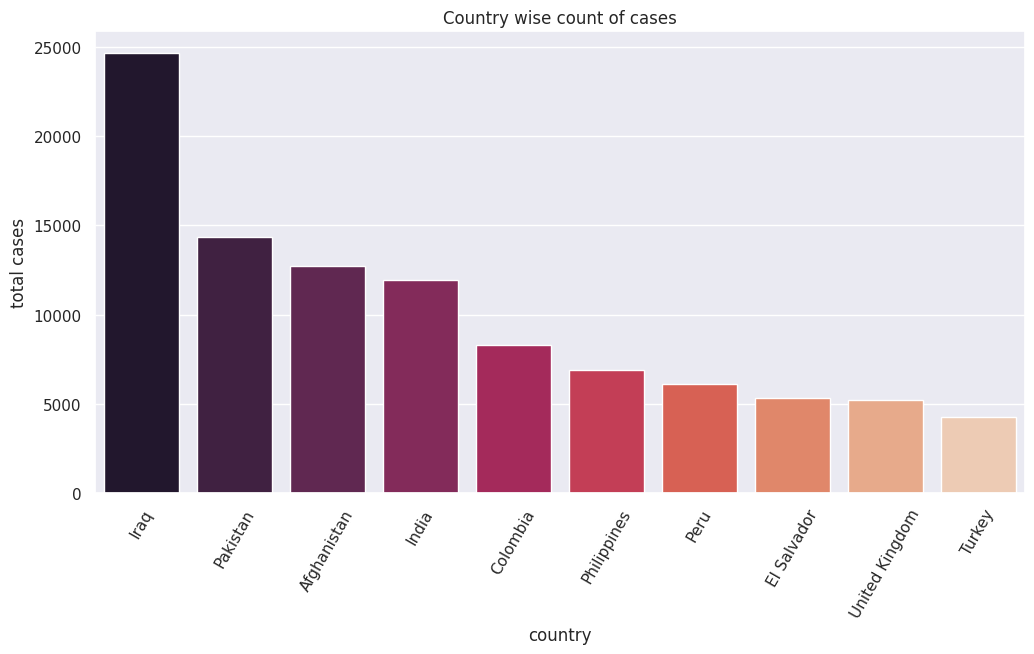

In [ ]:
#Bar plot showing the top 10 countries with the most number of cases
plt.subplots(figsize=(12,6))
sns.set_theme(style="darkgrid",context = 'notebook')
sns.barplot(x = gtd_df['country'].value_counts()[:10].index,y = gtd_df['country'].value_counts()[:10].values,palette = 'rocket').set(title = 'Country wise count of cases',xlabel = 'country',ylabel = 'total cases')
plt.xticks(rotation = 60)
plt.show()

#### Digging deeper into the region to find country wise terrorist activities it's quite visible that Iraq tops the list from the Middle East and North Africa region and then followed by next three South Asian regions i.e.Pakistan, Afghanistan and India. All these countries are heavily populated and still developing countries in the development index too.

####India is fourth in the list because of the very reason that the population and population density is very high.

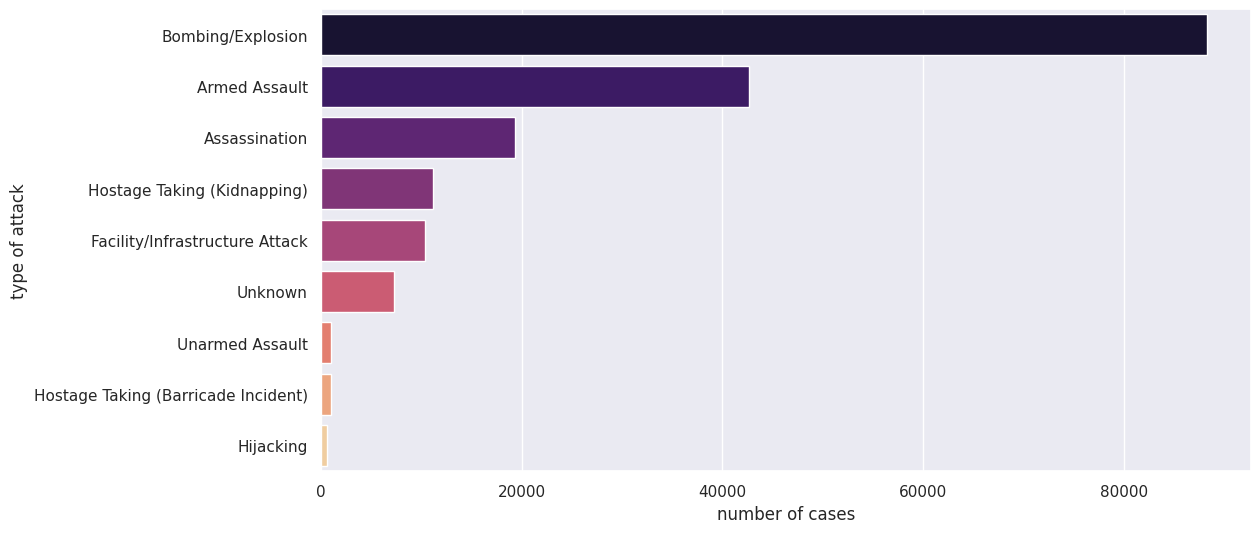

In [ ]:
#Visualising which attack type has the share of what number of cases 
plt.subplots(figsize=(12,6))
sns.set_theme(style="darkgrid",context = 'notebook')
sns.countplot(y='attack_type',data = gtd_df,order = gtd_df['attack_type'].value_counts().index,palette = 'magma').set(ylabel = 'type of attack',xlabel = 'number of cases')
plt.show()

####Bombing/Explosion followed by Armed Assault has been the mostly favoured attack type methods when it comes to execution of attacks.

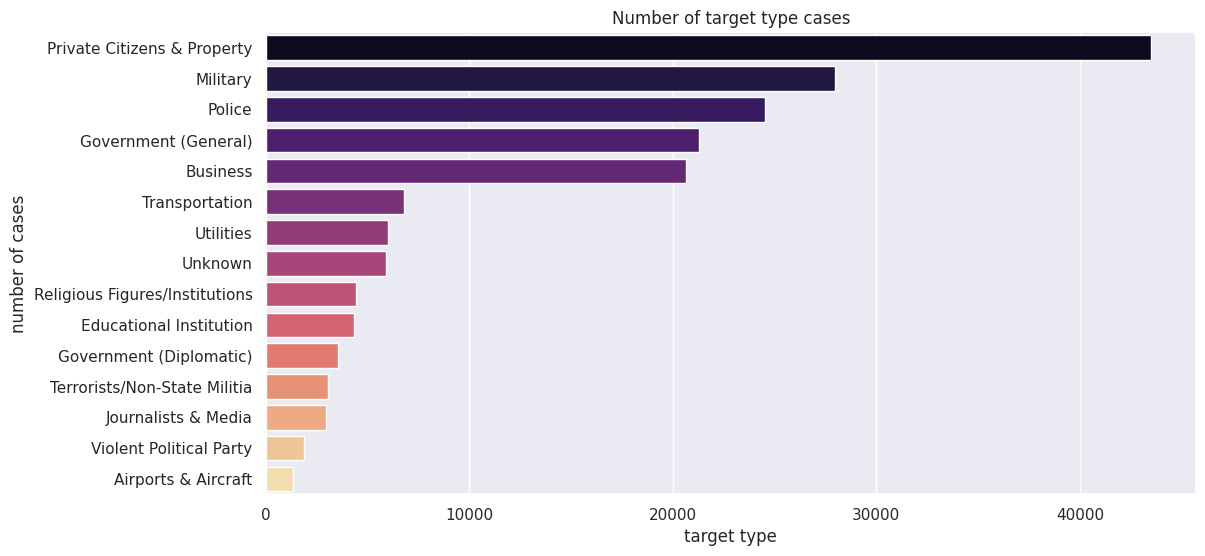

In [ ]:
#perceiving which target type has suffered what number of cases
plt.subplots(figsize=(12,6))
sns.set_theme(style="darkgrid",context = 'notebook')
sns.countplot(y ='target_type',data = gtd_df,order = gtd_df['target_type'].value_counts()[:15].index,palette = 'magma').set(title = 'Number of target type cases',xlabel = 'target type',ylabel = 'number of cases')
plt.show()

####Whatever the personal motive or agenda be for a terrorist activity, in any case, humanity has to suffer and the most affected are the common people. As it is very evident from the graph that private citizens and property has been the most targetted group type followed by military which does makes sense because they are the one fighting terrorism on the combat field which leads to more number of casualities.

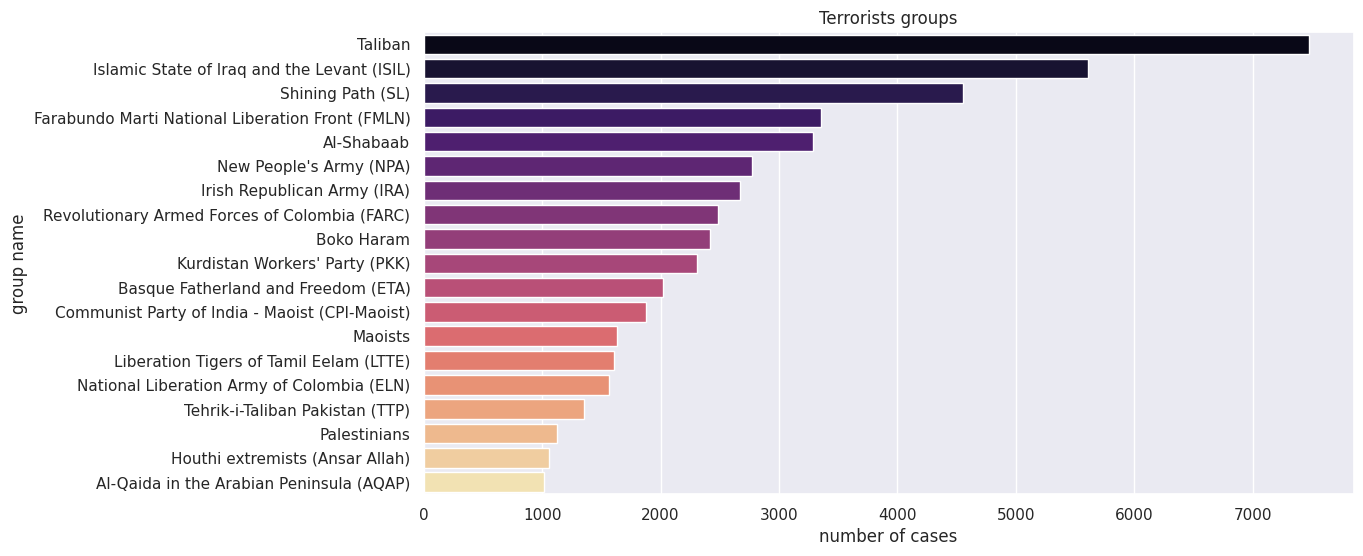

In [ ]:
#which terrorist group has been able to carry out their notorious acts in what number
plt.subplots(figsize=(12,6))
sns.set_theme(style="darkgrid",context = 'notebook')
sns.countplot(y='terror_group',data = gtd_df,order = gtd_df['terror_group'].value_counts()[1:20].index,palette = 'magma').set(title = 'Terrorists groups',ylabel = 'group name',xlabel = 'number of cases')
plt.show()

####Taliban has been the terorist group responsible for most number of the activities 

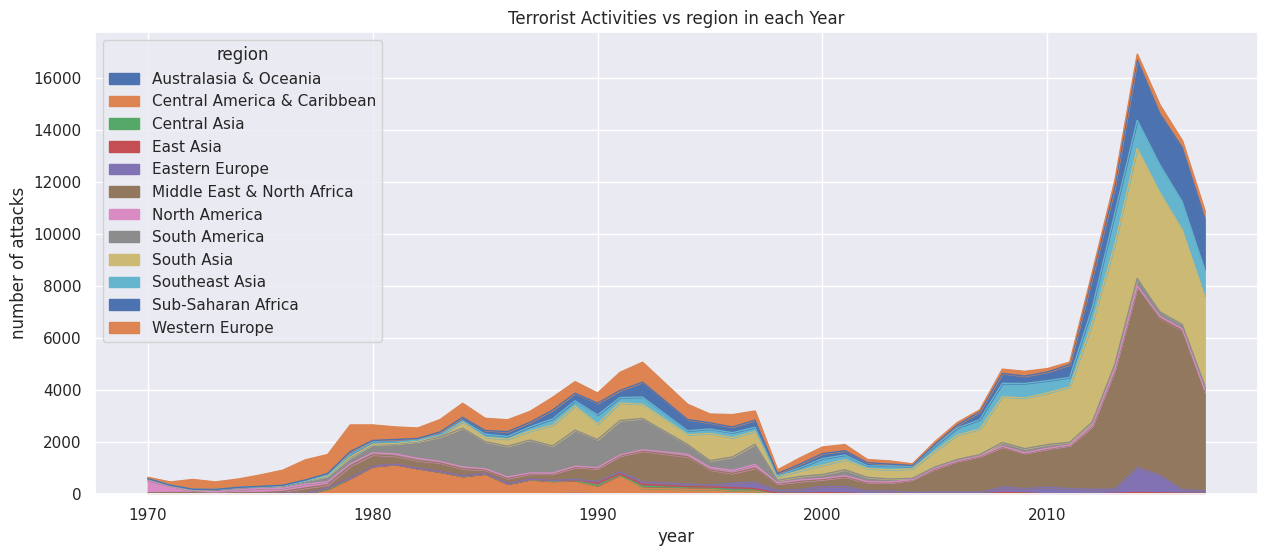

In [ ]:
#a year by year trend in the number of cases for each region
pd.crosstab(gtd_df.year, gtd_df.region).plot(kind='area',figsize=(15,6),linewidth = 1)
plt.title('Terrorist Activities vs region in each Year')
plt.xlabel('year')
plt.ylabel('number of attacks')
plt.show()

####South Asia and Middle East and North Africa have seen a sudden and continuous spike in the number of terrorist activites after the year 2000 without any drop.

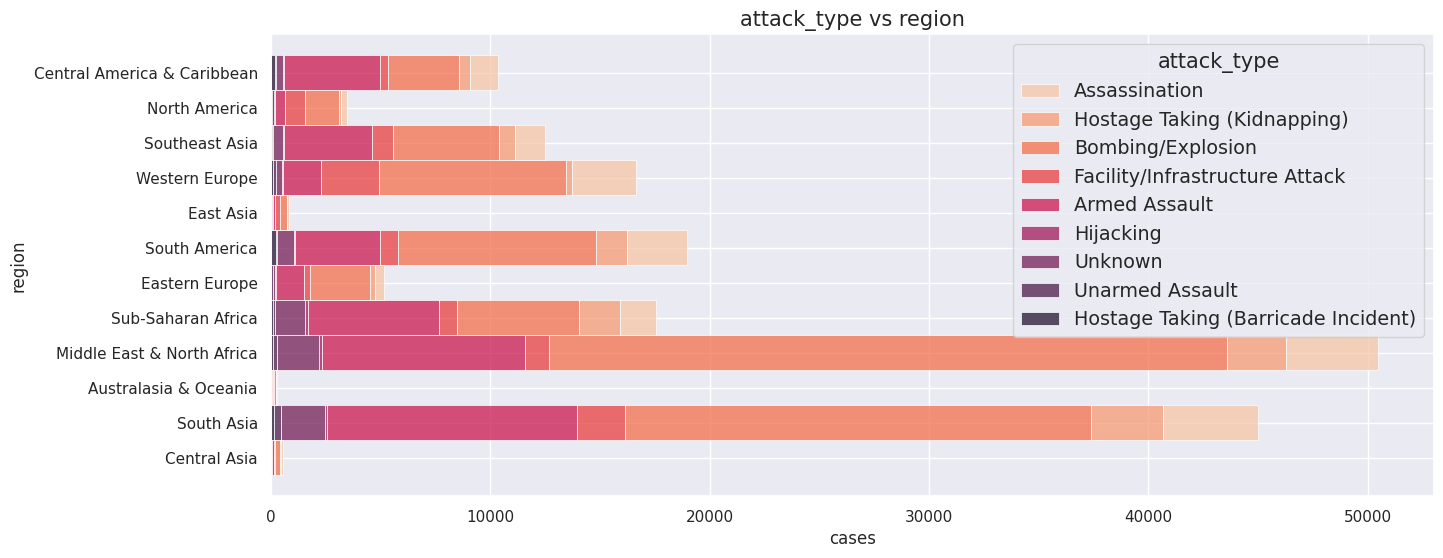

In [ ]:
#which attack type was the most resorted to in each of the regions
plt.subplots(figsize=(15,6))
sns.set_theme(style="darkgrid",context = 'notebook',font_scale=1.25)
sns.histplot(y = 'region',data = gtd_df,hue = "attack_type",multiple="stack",palette="rocket_r",linewidth = 0.5).set(title = 'attack_type vs region',xlabel = 'cases',ylabel = 'region')
plt.xticks(rotation = 0)
plt.show()

####As we saw earlier that Bombing/Explosion then Armed Assault have been the most prominent method to go with when it comes to implementing their activity. It is quiet visible that it has been the most prominent attack types irrespective of the region.

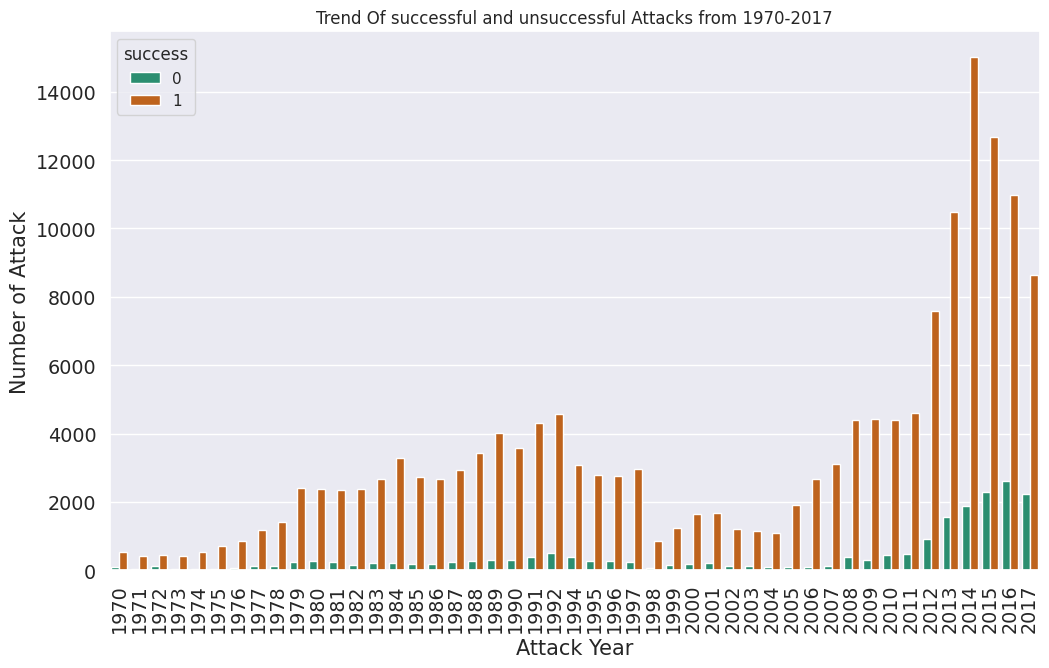

In [ ]:
#Trend in successful and unsuccessful attacks vs year
plt.subplots(figsize=(12,7))
sns.set_theme(style="darkgrid",context = 'notebook')
sns.countplot(x='year',hue='success',data=gtd_df,palette = 'Dark2').set(title = 'Trend Of successful and unsuccessful Attacks from 1970-2017',xlabel = 'Attack Year',ylabel = 'Number of Attack')
plt.xticks(rotation = 90)
plt.show()

####It is very obvious from the first visualization that yearwise increase in number of cases was visible since 2000 but here we are able to see that even though number of successful activities have increased with the coming years so does the unsuccessful attempts too. What we can roughly percieve from the plot is that technological advancements is not just from the governments' side but also from terrorists' side in respect of closer networks, more terrorist recruits, more funding,use of technology and many more.

In [ ]:
y = gtd_df.groupby('year').killed.sum()
x = gtd_df.groupby(['year']).year.count()
df_concat1 = pd.concat([x,y],axis = 1)
df_concat1.rename(columns = {'year':'total cases','killed':'total killed'},inplace = True)
df_concat1.reset_index(inplace = True)
df_concat1.head()

,year,total cases,total killed
0,1970,651,174.0
1,1971,471,173.0
2,1972,568,566.0
3,1973,473,370.0
4,1974,581,539.0


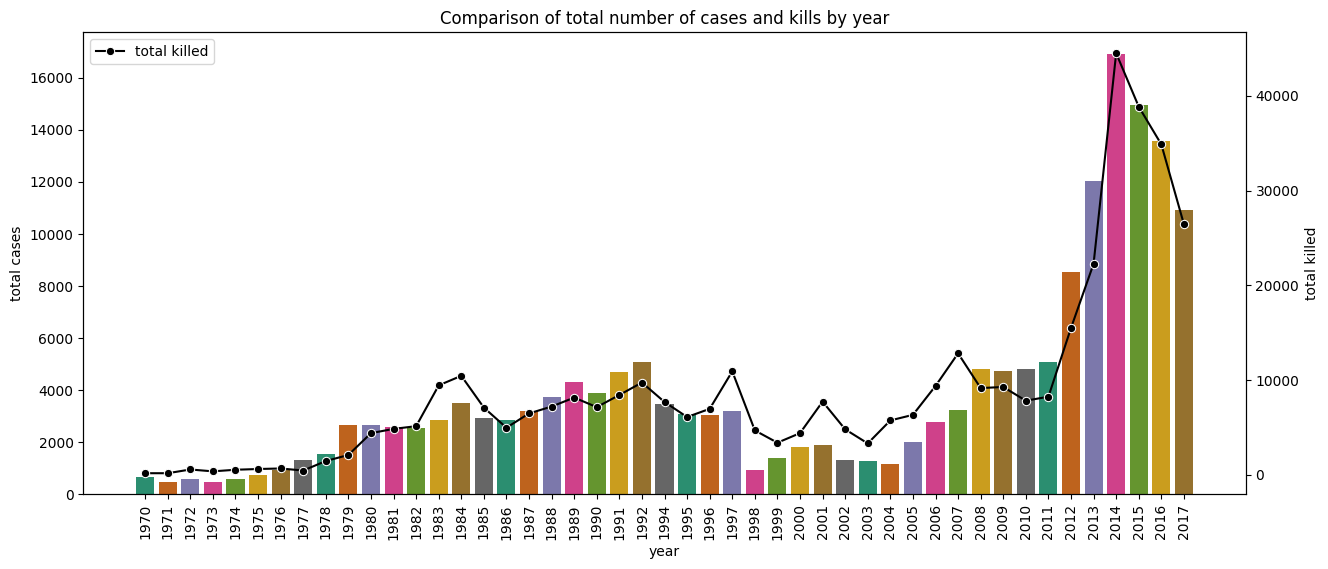

In [ ]:
import matplotlib
matplotlib.rc_file_defaults()

#Visualising what has been the trend between the total cases and the total killed vs each year

ax1 = sns.set_style(style = None,rc = None)
fig, ax1 = plt.subplots(figsize=(15,6))

#creating the bar plot
ax1.set_title('Comparison of total number of cases and kills by year', fontsize=12)
ax1 = sns.barplot( y='total cases',x= 'year' ,data = df_concat1,alpha = 1,palette = 'Dark2')

#specifying that we want to share the same x-axis
ax2 = ax1.twinx()

#creating the line plot 
ax2 = sns.lineplot(data = df_concat1['total killed'],marker = 'o',color = 'black')

#showing plot
ax1.set_xticklabels(ax1.get_xticklabels(),rotation = 90)
plt.legend(['total killed'])
plt.show()

####A worrisome scenario that is visible from the graph is that in the decade stretching from 1970 to 1980 total number of cases in proportion to total number of deaths have been high but since 1980 onwards there has been an upward trend in the total deaths as compared to total cases which tells us about the severity of the attack methods used to execute the activities.

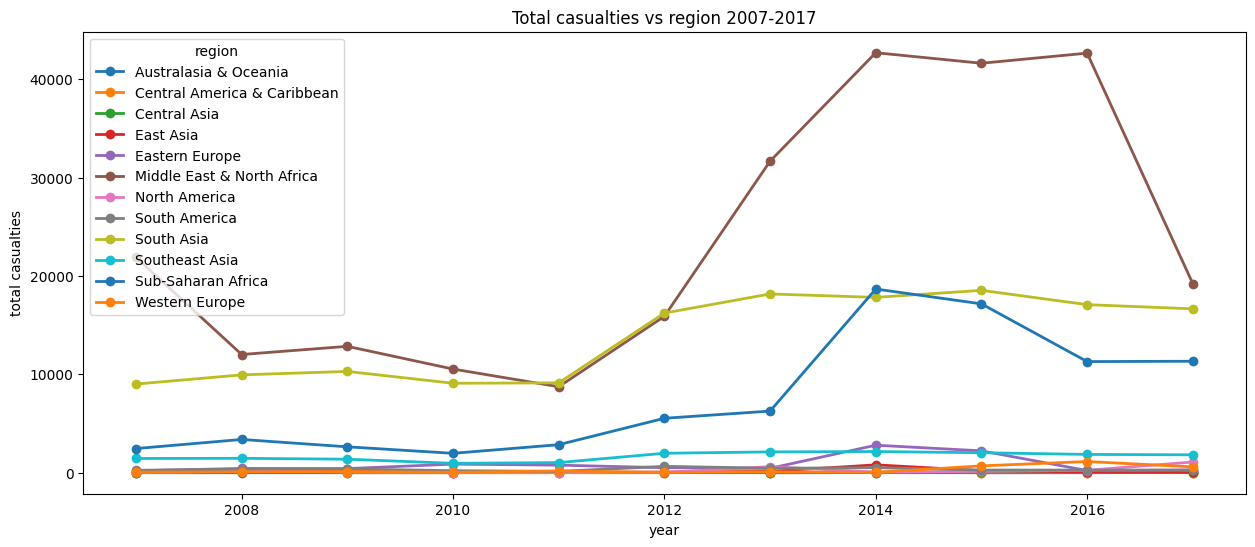

In [ ]:
#what has been the trend in the total casualties for each region between the years 2007-2017
pd.crosstab(index = gtd_df['year'], columns = gtd_df['region'],values=gtd_df['casualties'],aggfunc=np.sum)[-11:].plot(kind='line',figsize = (15,6),linewidth = 2,marker = 'o')
plt.title('Total casualties vs region 2007-2017')
plt.xlabel('year')
plt.ylabel('total casualties')
plt.show()

####Middle East, Sub Saharan Africa and South Asia have seen a sudden spike in the total number of casualities in the decade starting 2007.One interesting point to ponder is that there has been an anomalistic behaviour with a sudden decline in the total number of casualities in the Middle East region in 2017. We will answer this question in the coming visualizations.

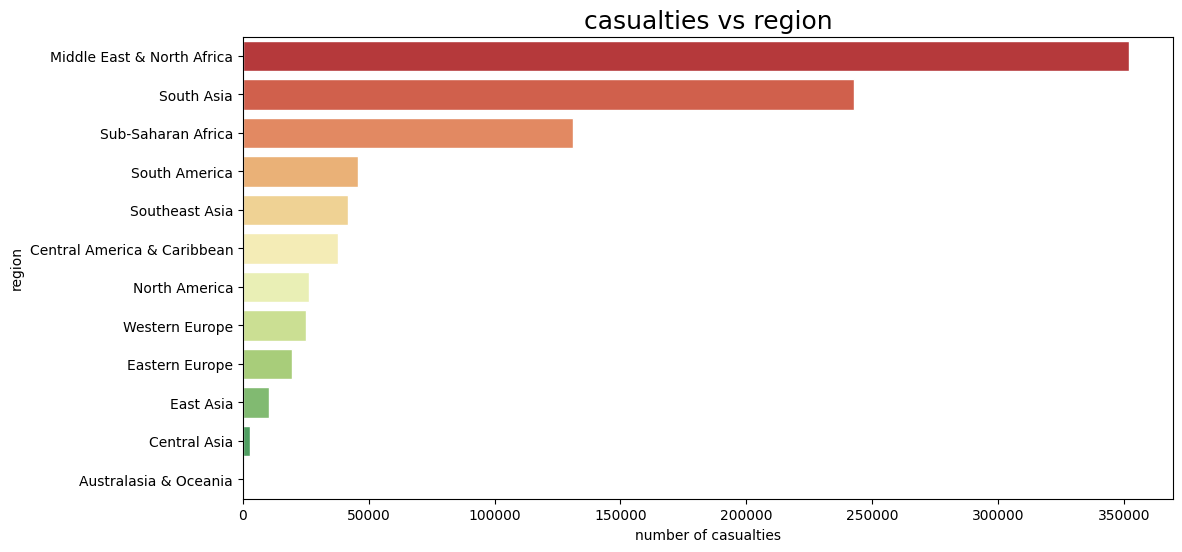

In [ ]:
kills_by_region= gtd_df.groupby(['region']).casualties.sum()
kills_by_region = kills_by_region.sort_index(level=['region']).sort_values(ascending = False)
plt.subplots(figsize=(12,6))
sns.set_theme(style="darkgrid",context = 'notebook',font_scale = 1.5)
daily_visits_plot=sns.barplot(y = kills_by_region.index,x = kills_by_region.values,palette = 'RdYlGn').set(title = 'casualties vs region',ylabel = 'region',xlabel = 'number of casualties')
plt.show()

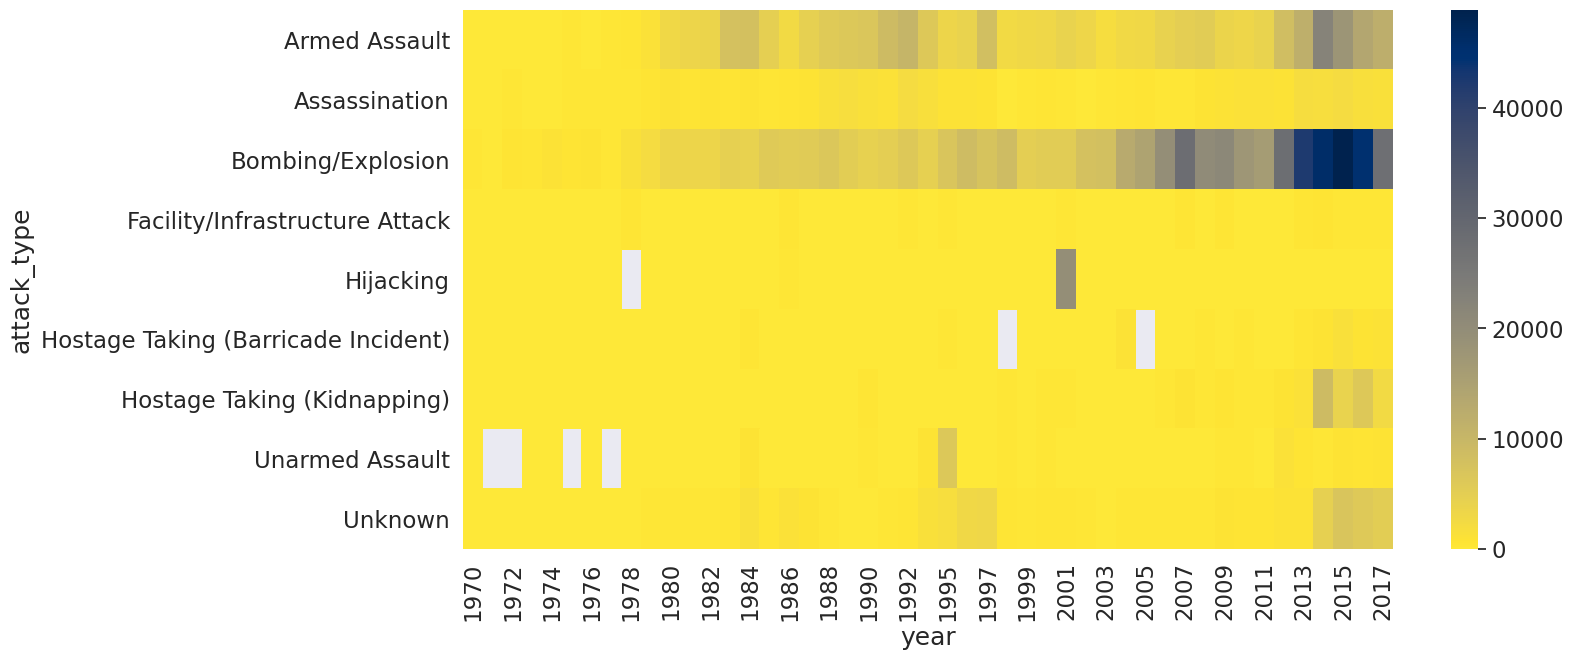

In [ ]:
attack_yr_cas = pd.crosstab(index = gtd_df['attack_type'], columns = gtd_df['year'],values=gtd_df['casualties'],aggfunc=np.sum)
plt.subplots(figsize=(15,7))

sns.heatmap(attack_yr_cas,annot = False,cmap = 'cividis_r')
plt.show()

####As is visibe from the visualization that since 1980 there has been a constant increase in Bombing/Explosion and Armed Assault, these methods are reason for the most number of people getting killed and wounded.

####We have kept the null values here too, just to have an idea about which attack type has no records in which year.

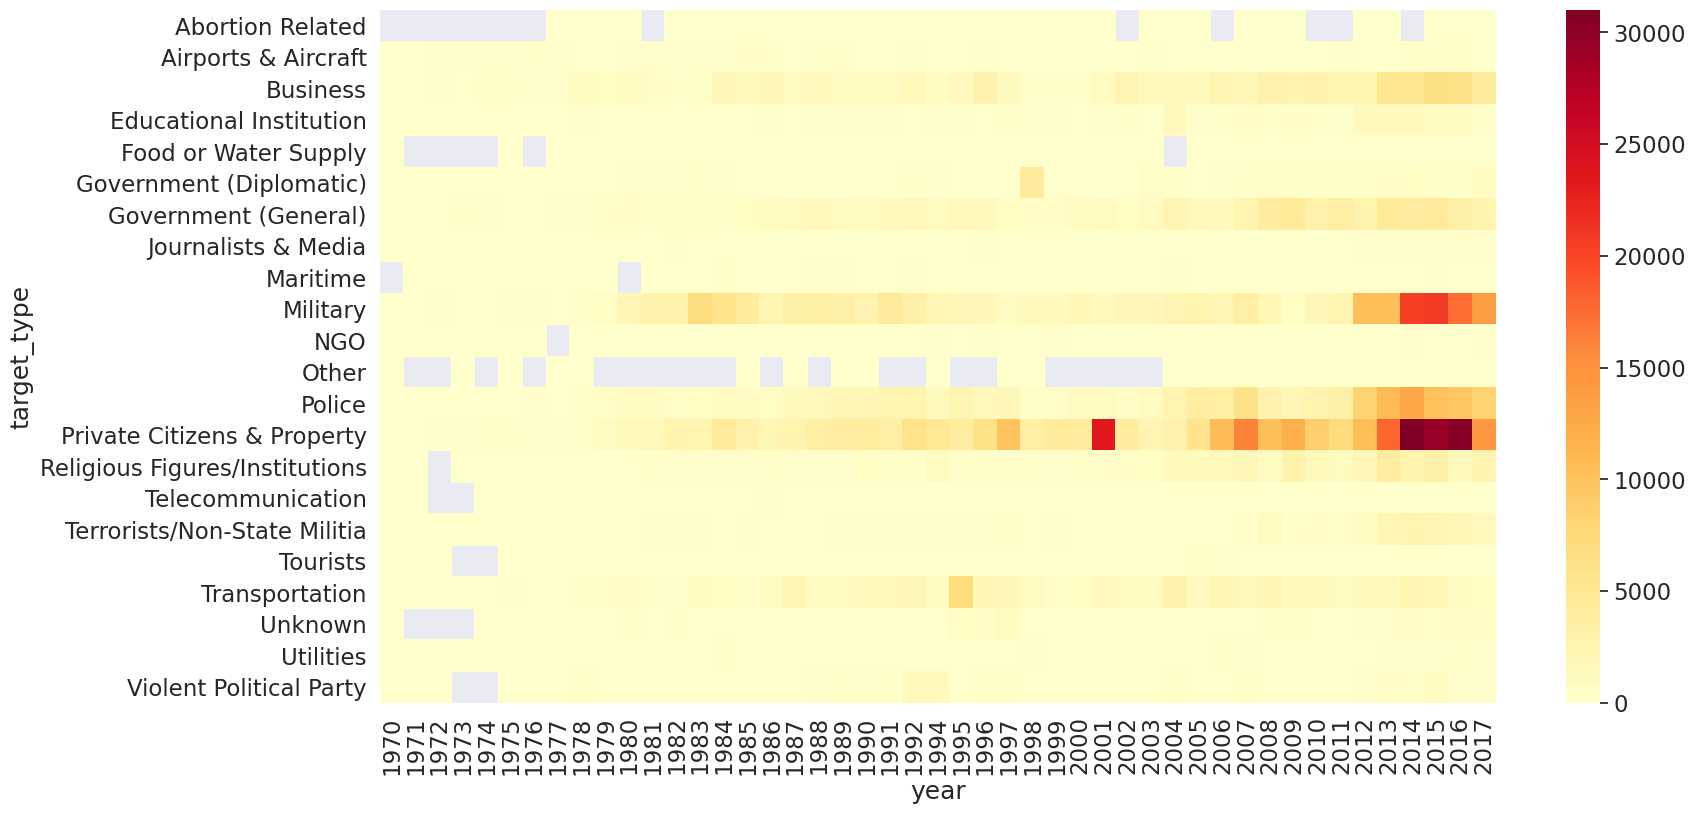

In [ ]:
yr_target_cas = pd.crosstab(columns = gtd_df['year'], index = gtd_df['target_type'],values=gtd_df['casualties'],aggfunc=np.sum)
plt.subplots(figsize=(18,9))

sns.heatmap(yr_target_cas, fmt='.2%',cmap = 'YlOrRd')
plt.show()

####The most affected ones in the decreasing order of target type are the Private Citizen and property > Military > Police > Government(General) > Business and so on. These are the target types that have continously been targetted by terrorist groups since 1984-1985. 

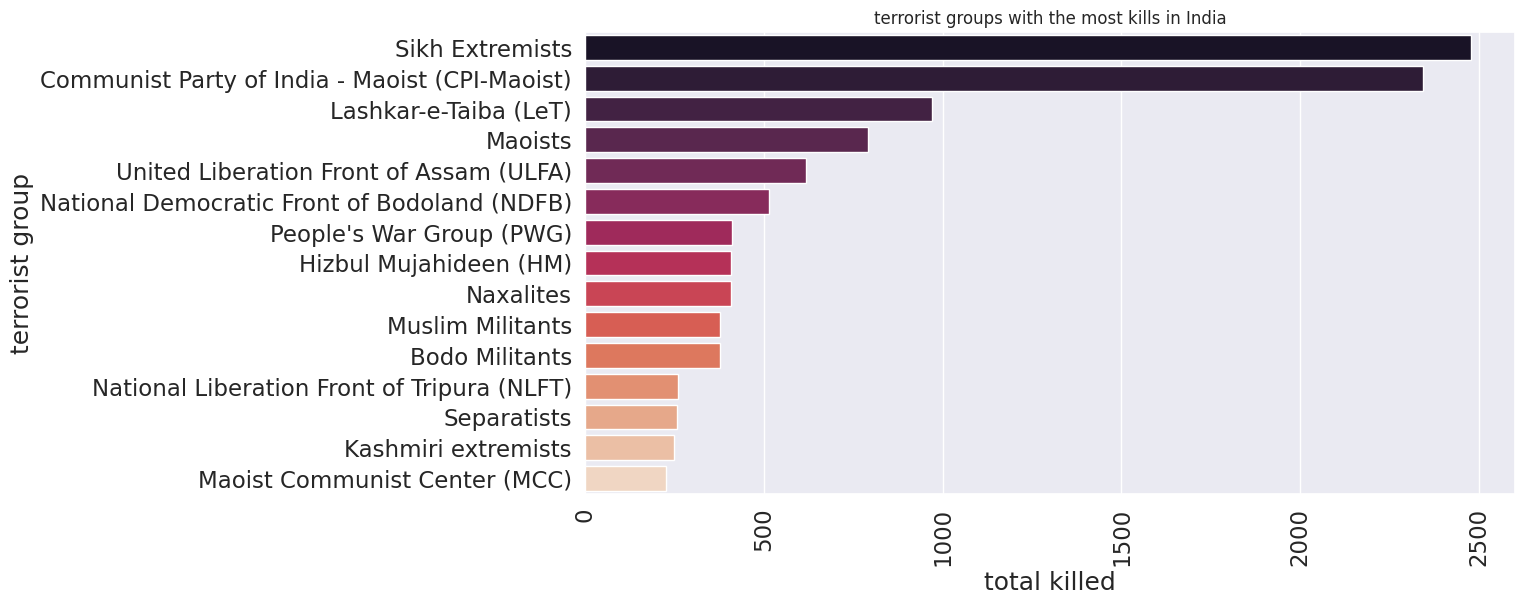

In [ ]:
#doing a groupby to find the killed statistics for India by Terrorist groups
co_tg_ki = pd.DataFrame(gtd_df.groupby(['country','terror_group'],as_index=False).killed.sum().sort_values('killed',ascending = False))

#renaming the columns for the temporary df created
co_tg_ki.rename(columns = {0:'country',1:'terror_group',3:'killed'},inplace = True)

#Filtering the country column searches only for India
in_tg_ki = co_tg_ki.loc[(co_tg_ki['country'] == 'India') & (co_tg_ki['terror_group'] != 'Unknown')][:15]

in_tg_ki

#Plotting the above table
plt.subplots(figsize=(12,6))
sns.set_theme(style="darkgrid")
sns.barplot(y = in_tg_ki['terror_group'],x = in_tg_ki['killed'],palette = 'rocket').set(title = 'terrorist groups with the most kills in India',xlabel = 'total killed',ylabel = 'terrorist group')
plt.xticks(rotation = 90)
plt.show()

####In the specific case of India the top terorrist groups have been the Sikh Extremists then the CPI-Maoist and then others as stated.One thing to notice in this grpah is that most of the terrorist groups in this list comprises of Seperatists and Extremisits.

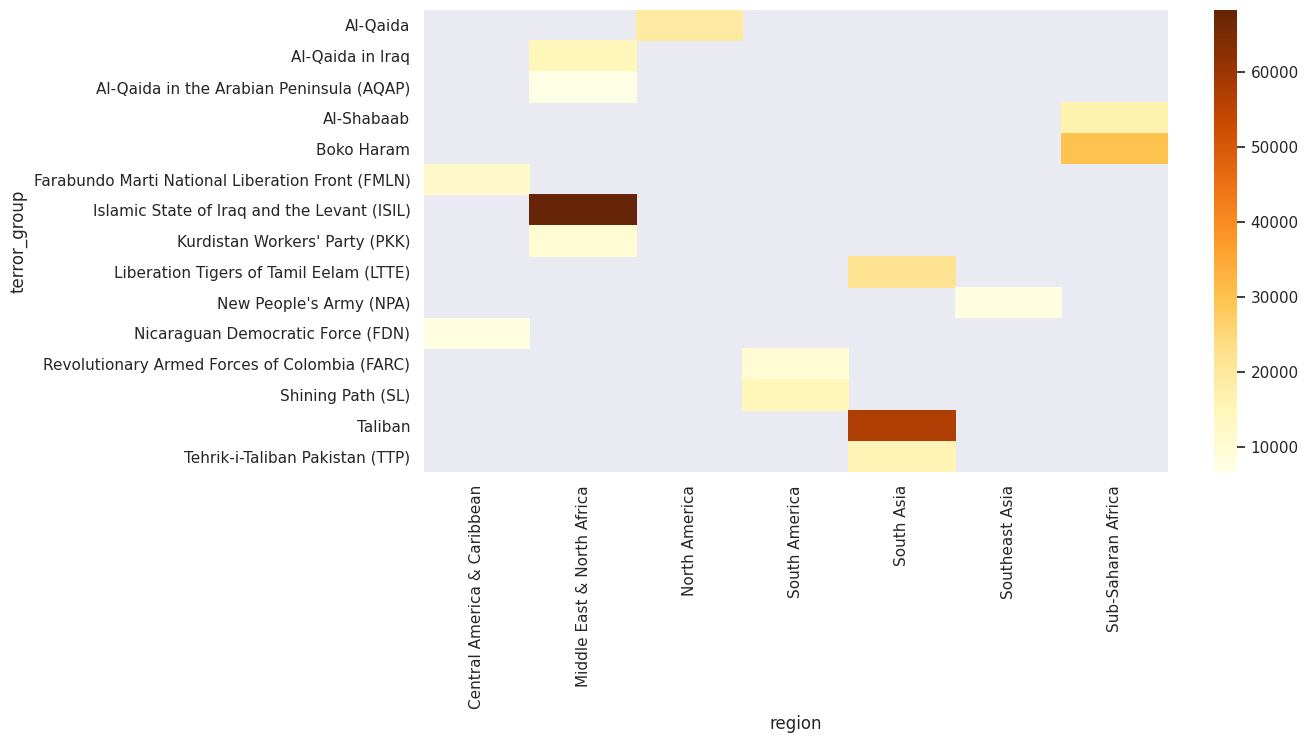

In [ ]:
gtd_x = pd.DataFrame(gtd_df.groupby(['terror_group','region']).casualties.agg(['sum']).sort_values('sum',ascending = False))
gtd_x.reset_index(inplace = True)


gtd_x.rename(columns = {'sum':'total casualties'},inplace = True)


z = gtd_x.loc[gtd_x['terror_group'] != 'Unknown'][:15]
z


cross3 = pd.crosstab(columns = z['terror_group'], index = z['region'],values=z['total casualties'],aggfunc=np.sum)
cross3


cross3 = pd.crosstab(index = z['terror_group'], columns = z['region'],values=z['total casualties'],aggfunc=np.sum)
plt.subplots(figsize=(12,6))

sns.heatmap(cross3, fmt='.2%',cmap = 'YlOrBr')


In [ ]:
gtd_c = pd.DataFrame(gtd_df.groupby(['terror_group','country','region']).agg({'killed':'sum','casualties':'sum'}).sort_values('casualties',ascending = False))
gtd_c.reset_index(inplace = True)


z_3 = gtd_c.loc[gtd_c['terror_group'] != 'Unknown'][:15]
z_3

,terror_group,country,region,killed,casualties
1,Taliban,Afghanistan,South Asia,29269.0,57140.0
2,Islamic State of Iraq and the Levant (ISIL),Iraq,Middle East & North Africa,31058.0,54755.0
4,Boko Haram,Nigeria,Sub-Saharan Africa,16917.0,24588.0
5,Liberation Tigers of Tamil Eelam (LTTE),Sri Lanka,South Asia,10928.0,21919.0
7,Al-Qaida,United States,North America,3001.0,19494.0
9,Tehrik-i-Taliban Pakistan (TTP),Pakistan,South Asia,6014.0,15532.0
10,Shining Path (SL),Peru,South America,11595.0,14625.0
11,Al-Qaida in Iraq,Iraq,Middle East & North Africa,4273.0,14348.0
12,Al-Shabaab,Somalia,Sub-Saharan Africa,8176.0,14201.0
13,Farabundo Marti National Liberation Front (FMLN),El Salvador,Central America & Caribbean,8019.0,12068.0
